In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999

In [37]:
def load_original_data():
    return pd.read_csv("data/Data_Marketing_Customer_Analysis_Round2.csv" )

In [38]:
def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer","number_of_open_complaints"])
    df=df.dropna()
    df=df[df['income']>0]
    df["total_claim_amount"]=round(df["total_claim_amount"],0)
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0)
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [39]:
customers_df= load_original_data()

In [40]:
customers_df.shape

(10910, 26)

In [41]:
customers_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [42]:
customers_df=clean_data(customers_df)

In [43]:
#3. Try a simple linear regression with all the data to see whether we are getting good results.

#### Check normality visually.

In [44]:
sns.pairplot(customers_df)
plt.show()

KeyboardInterrupt: 

# Plotting

EDA Catgorical Columns 

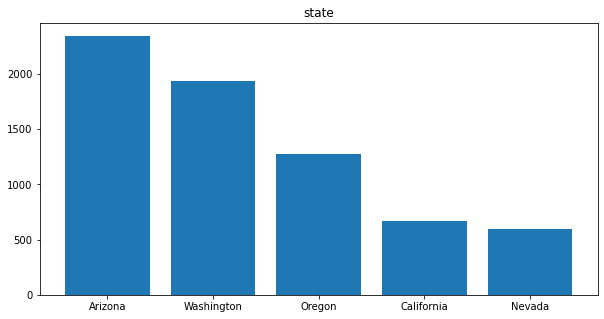

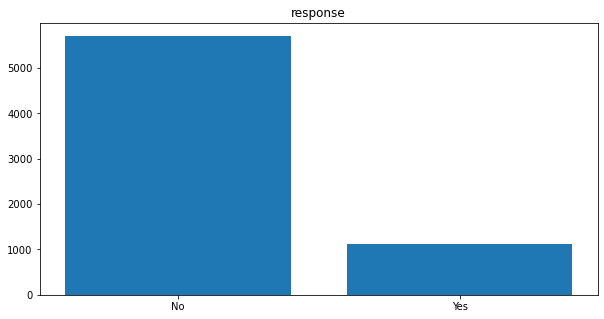

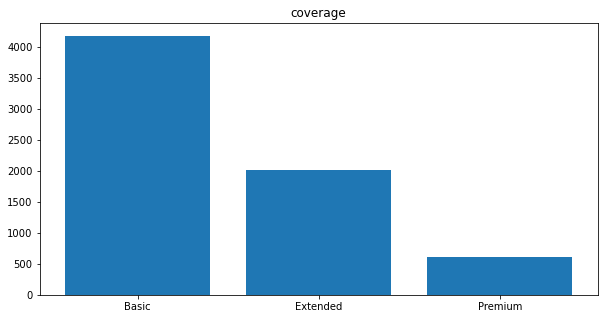

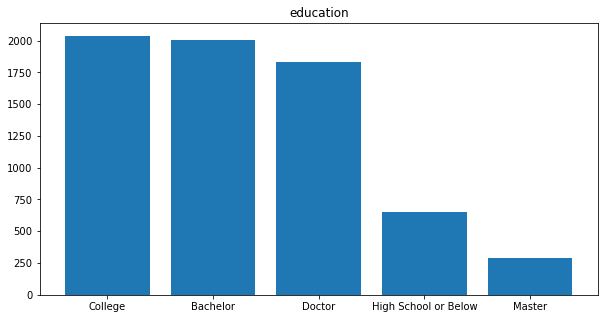

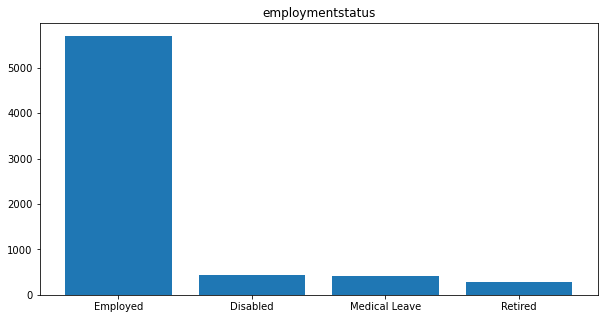

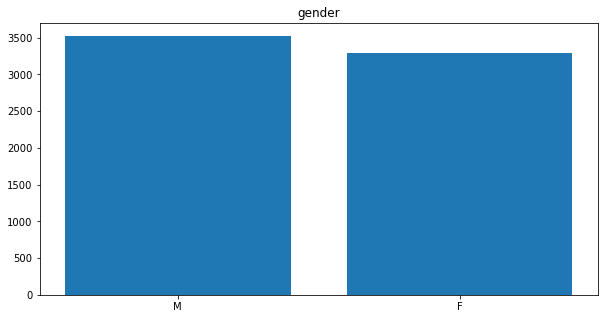

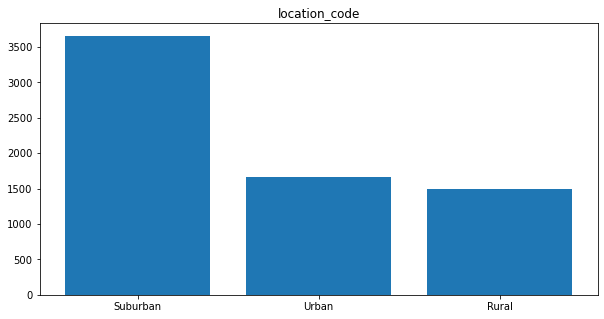

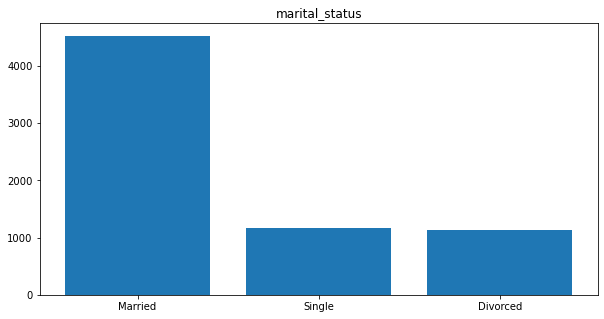

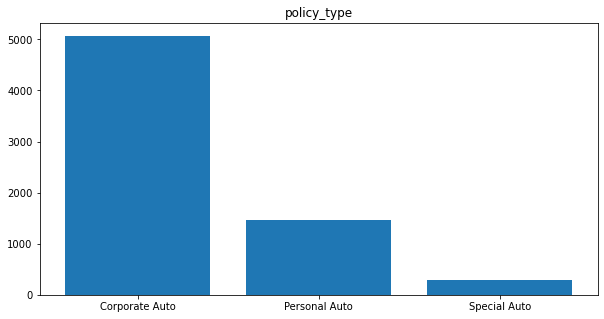

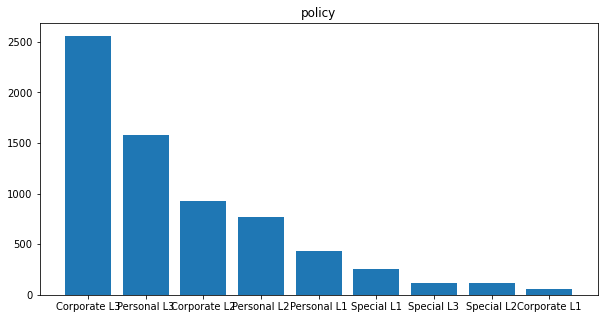

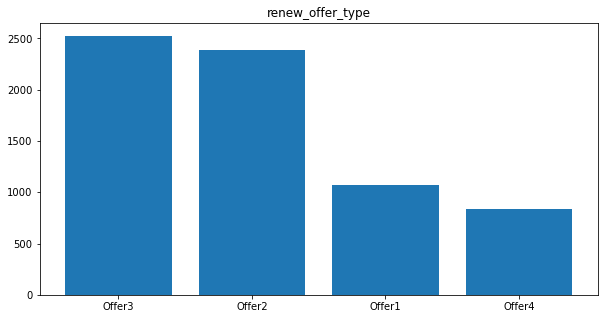

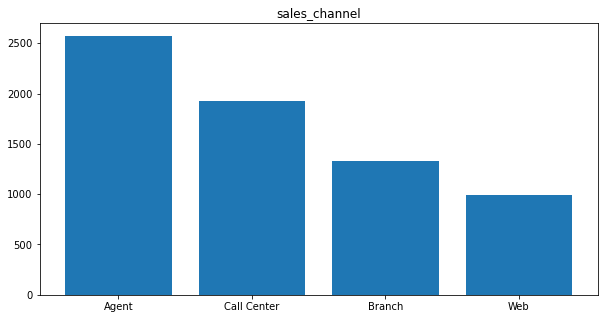

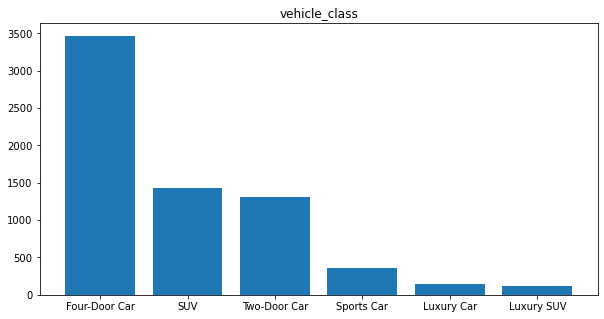

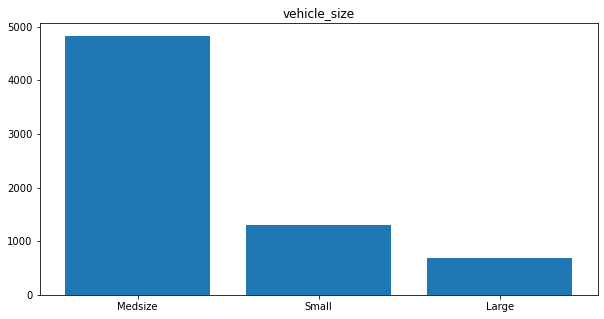

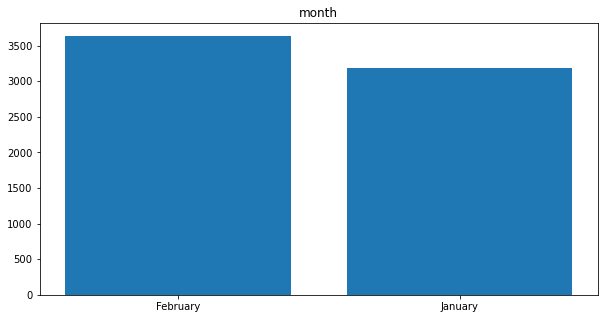

In [45]:
for c in customers_df.select_dtypes(object):
    plt.figure(figsize=(10,5))
    plt.bar(customers_df[c].unique(), customers_df[c].value_counts())
    plt.title(c)
    plt.show();

### Show a plot of the total number of responses.

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


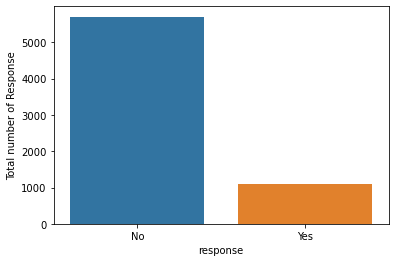

In [46]:
sns.countplot('response', data=customers_df)
plt.ylabel('Total number of Response')
plt.show()

### Show a plot of the response rate by the sales channel.

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


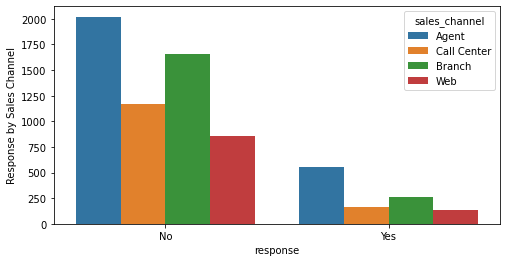

In [47]:
plt.figure(figsize=(8,4))
sns.countplot('response', hue='sales_channel', data=customers_df)
plt.ylabel('Response by Sales Channel')
plt.show()


### Show a plot of the response rate by the total claim amount.


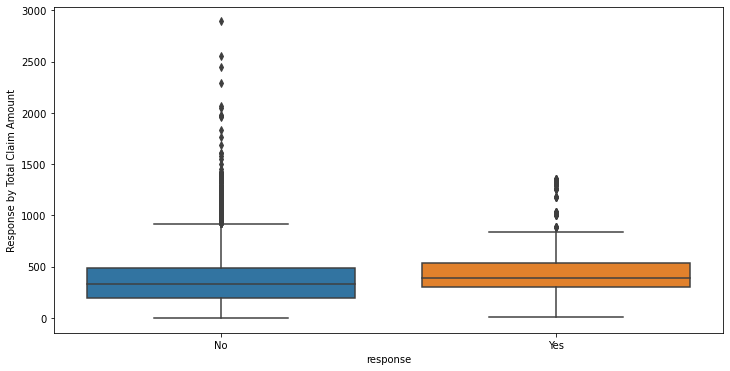

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(y='total_claim_amount' , x='response', data=customers_df)
plt.ylabel('Response by Total Claim Amount')
plt.show()


### Show a plot of the response rate by income.


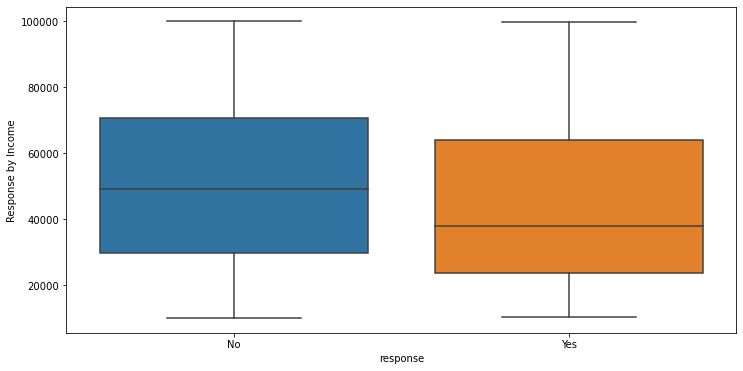

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(y='income' , x='response', data=customers_df)
plt.ylabel('Response by Income')
plt.show()

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

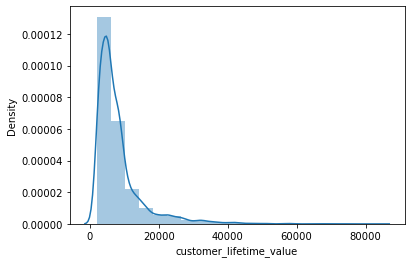

In [50]:
sns.distplot((customers_df['customer_lifetime_value']), bins=20)

In [51]:
monthly=boxcox(customers_df['customer_lifetime_value'],lmbda=0.02)

<AxesSubplot:ylabel='Count'>

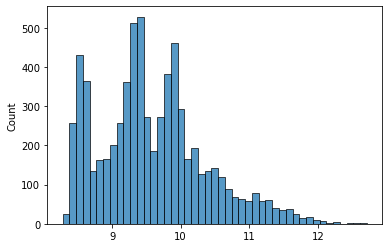

In [52]:
sns.histplot(monthly)

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

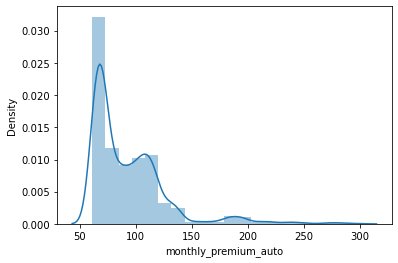

In [53]:
sns.distplot((customers_df['monthly_premium_auto']), bins=20)

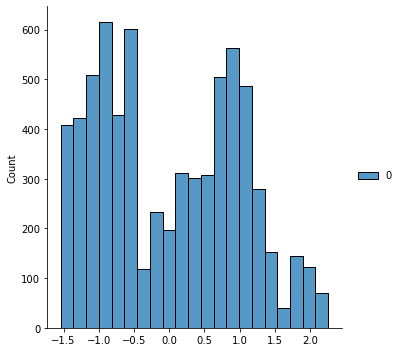

In [54]:
pt = PowerTransformer()
monthly=pt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly)

<AxesSubplot:ylabel='Count'>

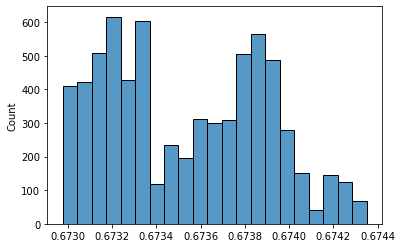

In [55]:
monthly,lam=boxcox(customers_df['monthly_premium_auto'])
sns.histplot(monthly)

<AxesSubplot:ylabel='Count'>

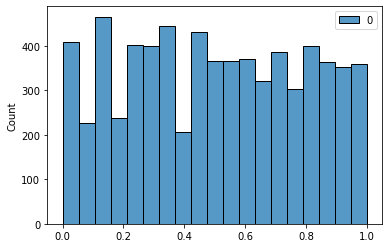

In [56]:
qt = QuantileTransformer()
monthly=qt.fit_transform(customers_df['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.histplot(monthly)

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

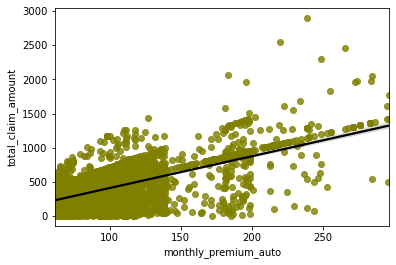

In [57]:
sns.regplot(x='monthly_premium_auto',y='total_claim_amount', data=customers_df, scatter_kws={"color": "olive"}, line_kws={"color": "black"})

#### Checking Multicorrelinilaty

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.002916   
income                                        0.002916  1.000000   
monthly_premium_auto                          0.399491 -0.012372   
months_since_last_claim                       0.018531 -0.034453   
months_since_policy_inception                 0.011275  0.015799   
number_of_policies                            0.022683 -0.001324   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.399491                 0.018531   
income                                    -0.012372                -0.034453   
monthly_premium_auto                       1.000000                 0.005887   
months_since_last_claim                    0.005887                 1.000000   
months_since_policy_inception              0.020112                -0.039993   
number_of_policies                        -

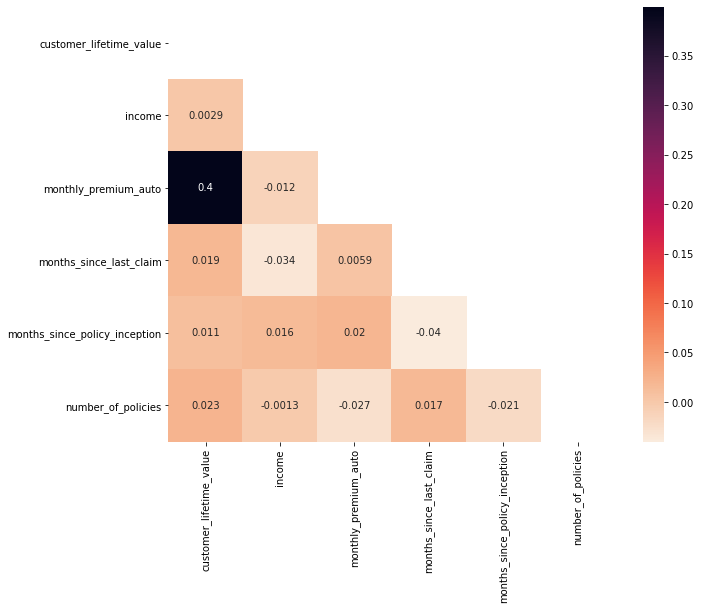

In [58]:
correlations = numericals_features.corr()
print(correlations)
cmap = sns.cm.rocket_r  ## for reversing the colors
mask=np.zeros_like(numericals_features.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numericals_features.corr(), mask=mask, annot=True,cmap=cmap)
plt.show()

X-Y split  
splitting the target variable from the dependent variables

In [59]:
X=customers_df.drop('total_claim_amount', axis=1)
y=customers_df.total_claim_amount

# we drop some useless columns
X=X.drop(columns=['effective_to_date'])

Get the numeric data.

In [60]:
numericals_features =X._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,4809.0,48029,61,7.0,52,9
2,14948.0,22139,100,34.0,31,2
3,22332.0,49078,97,10.0,3,2
6,5035.0,37405,63,8.0,99,4
7,4956.0,87197,63,35.0,45,3


In [61]:
numericals_features.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.234707,50456.580461,92.963034,15.046941,47.832624,2.951005
std,6949.068193,24305.956566,34.615160,10.064762,27.895350,2.390613
min,2120.000000,10037.000000,61.000000,0.000000,0.000000,1.000000
25%,4091.000000,28432.000000,68.000000,6.000000,24.000000,1.000000
50%,5811.000000,48081.000000,83.000000,14.000000,48.000000,2.000000
75%,9076.000000,70187.000000,109.000000,23.000000,71.000000,4.000000
max,83325.000000,99981.000000,297.000000,35.000000,99.000000,9.000000


#### Normalize

In [62]:
##def normalize(X):
##    X_mean=X.mean(axis=0)
##    X_std=X.std(axis=0)
##    X_std[X_std==0]=1.0
##    X=(X-X_mean)/X_std
##    return X

##X_num=normalize(X_num)

In [63]:
X_scaled=StandardScaler().fit_transform(numericals_features)
X_scaled.shape

(6817, 6)

Get Categorical data

In [64]:
categoricals_features = X.select_dtypes(object)
categoricals_features.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,February
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,February
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,January
6,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,February
7,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,February


### Categorical Variables Transformation

One Hot Encoding

In [65]:
# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
##pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray(),
## columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_features.columns)).head()

In [66]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,month_January
0,4809.0,48029,61,7.0,52,9,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,14948.0,22139,100,34.0,31,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
3,22332.0,49078,97,10.0,3,2,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
6,5035.0,37405,63,8.0,99,4,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
7,4956.0,87197,63,35.0,45,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0


### Train Test Split

In [67]:
X_train, X_test, y_train, y_test=train_test_split(all_features, y, test_size=.20)

In [68]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,month_January
7664,7284.0,67780,92,0.0,72,3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
6428,2468.0,19352,65,16.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7632,2227.0,27972,61,7.0,38,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
1061,5545.0,79619,71,3.0,34,6,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
6481,7285.0,44788,61,6.0,48,2,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9642,8897.0,26201,112,4.0,48,8,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1
8984,13467.0,11432,119,11.0,9,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7744,22243.0,83894,110,6.0,46,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2585,14942.0,22978,190,8.0,53,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


### Apply Linear Regression

In [69]:
model=LinearRegression()    # model
model.fit(X_train.to_numpy(), y_train)   # model train
y_pred=model.predict(X_test.to_numpy())   # model prediction
y_pred_train=model.predict(X_train.to_numpy())

Text(0.5, 1.0, 'Train Residual histogram')

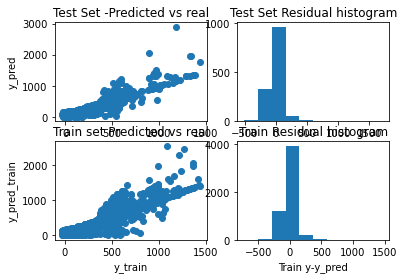

In [70]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2)
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

# Linear Regression

In [73]:
#The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:
model.intercept_ #intercept

-311.6676077331851

In [75]:
model.coef_ #slope

array([ 4.17031830e-04, -3.10173085e-04,  4.83738772e+00,  3.07070309e-01,
       -8.36052516e-03,  5.91797719e-01,  2.69491583e+00,  3.41516975e+00,
        3.61515512e+00,  1.03671062e+01, -4.34994929e+00, -1.50072637e+01,
       -2.47030599e+01, -1.76696238e+00, -9.01174770e+00,  1.88550598e+00,
       -4.70423206e+00, -3.57763940e+00,  1.56629193e+01, -9.07768627e+00,
        7.22282144e+00,  3.75227680e+02,  2.18751066e+02, -6.68904564e+00,
        1.64790784e+00,  6.24050014e+00,  1.58288145e+01, -1.59477931e-01,
        9.78757875e+00,  8.56962405e+00, -5.37930068e-01, -1.79119384e+00,
        2.37100935e+01, -7.44712313e+00, -4.34155891e-01,  1.11195158e+01,
        9.72544850e+00,  9.79909766e+00,  1.60524272e+00, -2.27242729e+00,
        4.33173334e+00, -5.82352029e+01, -5.64166981e+01, -3.53636116e+01,
       -4.65569429e+01,  3.89275319e-01, -1.23625119e+00,  2.21885131e+00,
        3.15557017e+00])

In [ ]:
#The code above illustrates how to get 𝑏₀ and 𝑏₁. 
#You can notice that .intercept_ is a scalar, while .coef_ is an array.
#The value 𝑏₀ = -311.67 (approximately) illustrates that your model predicts the response -311.7 when 𝑥 is zero. The value 𝑏₁ = 0.54 means that the predicted response rises by 0.54 when 𝑥 is increased by one.

In [80]:
np.exp(-311.6676077)

4.410398054559128e-136

#### Model Validation

MSE.

In [24]:
from sklearn.metrics import mean_squared_error as mse
train_mse=mse(model.predict(X_train.to_numpy()), y_train)
test_mse=mse(model.predict(X_test.to_numpy()), y_test)

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 12824.538748240173 -- test MSE: 11448.876850118255


RMSE.

In [25]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 113.24548003448162 -- test RMSE: 106.99942453171538


MAE.

In [26]:
from sklearn.metrics import mean_absolute_error as mae
train_mae=mae(model.predict(X_train.to_numpy()), y_train)
test_mae=mae(model.predict(X_test.to_numpy()), y_test)

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 12824.538748240173 -- test MAE: 11448.876850118255


R2.

In [27]:
r2= model.score(X_test.to_numpy(), y_test)

In [28]:

print ('train R2: {} -- test R2: {}'.format(model.score(X_train.to_numpy(), y_train),
                                            model.score(X_test.to_numpy(), y_test)))

train R2: 0.799838895158075 -- test R2: 0.817677011326007


adjusted rsquare

In [29]:
N=X_train.shape[0]
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.8176435637037957


In [82]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

#model=Lasso()
#model.fit(X_train, y_train)
#print(f”{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}“)

## Function for Model Performance

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

In [136]:
# Evaluating Linear Regression

In [137]:
performance_lm, _, _ = model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_lm

NameError: name 'y_pred_train_lm' is not defined

# Lasso 

In [125]:
model = Lasso()

In [126]:
model.fit(X_train, y_train)

Lasso()

In [127]:
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.8034393528051816, Test -> 0.7867702422102331


## Ridge 

In [128]:
model = Ridge()

In [129]:
model.fit(X_train, y_train)

Ridge()

In [130]:
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.8062781325522462, Test -> 0.7927852667917894


## KNN

In [131]:
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification

# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=10) # n_neighbors = K

In [132]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=10)

In [133]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-124-0d04e0e700de>:5: RuntimeWarning: overflow encountered in exp
  ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
<ipython-input-124-0d04e0e700de>:6: RuntimeWarning: overflow encountered in exp
  ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))
<ipython-input-124-0d04e0e700de>:8: RuntimeWarning: overflow encountered in exp
  MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [134]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

/Users/testaccount/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-124-0d04e0e700de>:5: RuntimeWarning: overflow encountered in exp
  ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
<ipython-input-124-0d04e0e700de>:6: RuntimeWarning: overflow encountered in exp
  ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))
<ipython-input-124-0d04e0e700de>:8: RuntimeWarning: overflow encountered in exp
  MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Function to compare different models 

In [104]:
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [
          ('Lasso', Lasso()), 
          ('Linear Regression', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('Ridge', Ridge()),         
        ]
    results = []
    names = []
    scoring = ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'number_of_policies']
    
    target_names = ['total_claim_amount']
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [105]:
final

NameError: name 'final' is not defined

#### Feature Importance

In [30]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: 0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


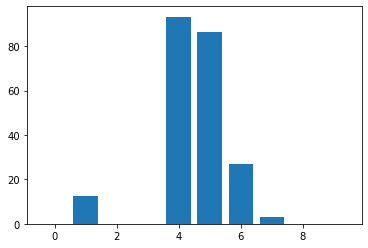

In [32]:
#different source
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

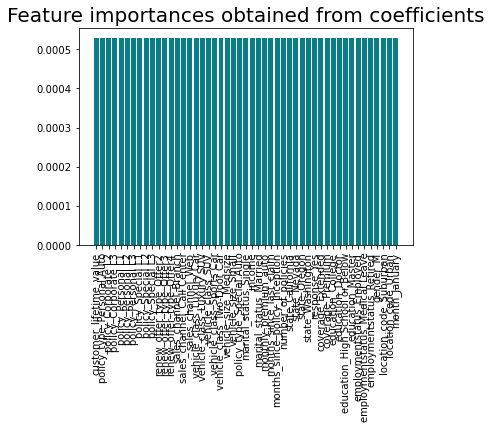

In [33]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()